**Problem 4** : ***Infinite Square Well*** 
    
    Solve the Schrodinger equation for Infinite Square Well and plot the ground state and two excited states of energy. Also compare the numerical result with the analytical result. 
    
$$\begin{equation*}
V(x)={\begin{cases}\infty,& x <0 \\ 0,& 0 \le x \le a \\\infty ,&x > a\end{cases}}
\end{equation*}$$

## Method_1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
%matplotlib inline
from scipy.sparse.linalg import eigsh

    Two point finite difference method of finding the derivative is nothing but central difference formula
    
$$f'(a) \approx = \frac{f(a + h) - f(a - h)}{2h} $$

    Here we make define the derivative in terms of a matrix which then can be applied directly on a function.  

In [2]:
def derivative_op(a,b,N = 100):
    """
    Defines the matric form of the derivative operator 
    
    params:
    a : initial point 
    b : final point 
    (b-a) gives the length of the interval
    N : Number of co-ordinate points 
    """
#     x = np.linspace(a,b,N) # x-vector 
    dx = x[1] - x[0] # step 
    k = [np.ones(N-1),-np.ones(N-1)] # list of array containing 1 and -1 of size N-1
    offset = [1,-1] # offset from the diagonal 1: above -1: below 
    D = diags(k,offset).toarray() # array with elements above diagonaland below diagonal
    D = D/(2 * dx) # the derivative operator
    return D

    Three-point finite-difference representation of Laplacian

In [3]:
def laplacian_op(a,b,N = 100):
    """
    Defines the matric form of the Laplacian operator 
    
    params:
    a : initial point 
    b : final point 
    (b-a) gives the length of the interval
    N : Number of co-ordinate points 
    """
#     x = np.linspace(a,b,N) # x-vector 
    dx = x[1] - x[0] # step 
    k1 = [np.ones(N-1),-2*np.ones(N),np.ones(N-1)]
    offset = [-1,0,1]
    Lap = diags(k1,offset).toarray()
    Lap = Lap/(dx ** 2)
    return Lap

In [4]:
N = 100
a = 0
b = 2 * np.pi
x = np.linspace(a,b,N) # x-vector 
D = derivative_op(a,b,N) #Derivative 
L = laplacian_op(a,b,N) #Laplacian

    Fixing the end points 
$$f(0) = f(L) = 0 $$

In [5]:
# f(0) = 0
D[0,0] = 0
D[0,1] = 0
D[1,0] = 0
# f(L) = 0
D[N-1,N-2] = 0
D[N-2,N-1] = 0
D[N-1,N-1] = 0

In [6]:
# f(0) = 0
L[0,0] = 0
L[0,1] = 0
L[1,0] = 0
# f(L) = 0
L[N-1,N-2] = 0
L[N-2,N-1] = 0
L[N-1,N-1] = 0

    Let us test the operator first on a function 
 
 $$y = sin(x)$$

In [7]:
y = list(map(lambda x: np.sin(x) , x))
dydx = np.dot(D,y)
lap = np.dot(L,y)

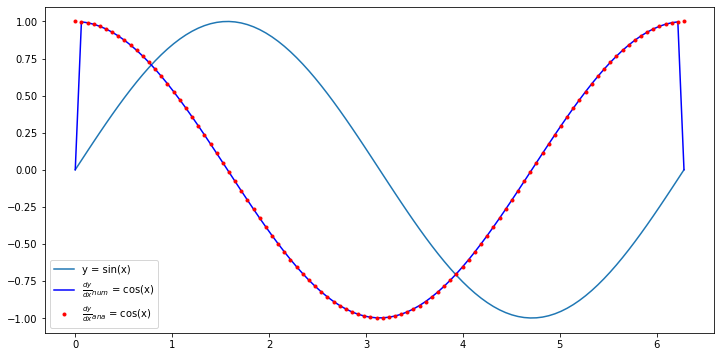

In [8]:
plt.figure(figsize=(12,6))
plt.plot(x,y,label="y = sin(x)")
plt.plot(x,dydx,"b-",label=r"${\frac{dy}{dx}}_{num}$ = cos(x)")
plt.plot(x,np.cos(x),'r.',label=r"$\frac{dy}{dx}_{ana}$ = cos(x)")
plt.legend()

    we have from Schrodinger equation,
$$\hat{H} = -\frac{\hbar^2}{2m} \nabla^2 $$

In [9]:
def show_wavefn(n = [1,2]):
    """
    Displays the wavefunction for the infinite potential well
    for states.
    
    params:
    n : list of numbers  for the states(eg. n = [1,2,3])
    default is n = [1,2]
    """
    for item in n:
        state = item + 1 # n+1 corresponds to nth state 
        vec = vecs[:, state] #eiegenfunction for state 
        mag = np.sqrt(np.dot(vecs[:, state],vecs[:, state])) #Normalisation
        vec = vec/mag # Final eiegenfunction
        plt.plot(x, -vec, label=r"$\psi_{E_%i}$"%item) #-vec is plotted to match with usual results
    plt.xlabel(r"$x$")
    plt.ylabel(r"$\psi(x)(\frac{1}{m})$")
    # plt.savefig("eigenvectors.png", dpi=600)
    plt.legend(prop={'size': 12})    
    plt.show()
    

In [10]:
hbar = 1 #hbar set to 1
m =1 #electron mass 
H = -(1/2)*((hbar ** 2)/m) * L # Hamiltonian
vals, vecs = eigsh(H, which='SM')

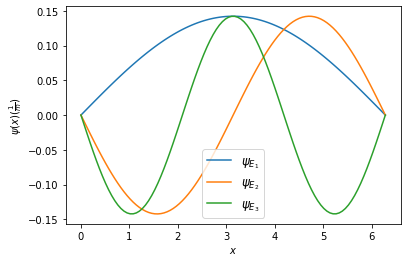

In [11]:
show_wavefn(n=[1,2,3])